In [11]:
 #list of useful libraries required for the project
import os
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from glob import glob
import seaborn as sns
import random
from keras.preprocessing import image
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,GlobalAvgPool2D,GlobalMaxPooling2D
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
data = !unrar x https://drive.google.com/drive/u/0/folders/154a-MsWoPXBc4CvnQITTm0FOlmG7hSeH

In [14]:
data=r'/content/train'

In [15]:
images=[]
import os
for dirname,_,filenames in os.walk(data):
  for filename in filenames:
    file_name, file_extension = os.path.splitext(filename)
    if file_extension == '.db':
      continue
    else:
      img=os.path.join(dirname,filename)
      images.append(img)

In [16]:
images[:20]

[]

In [17]:
len(images)

0

In [18]:
class_values = []
for i in images:
    j = i.split('/')
    class_values.append(j[-2])

In [19]:
class_values[:10]

[]

In [20]:
len(class_values)

0

In [21]:
temp = list(zip(images,class_values))
random.shuffle(temp)
images, class_values = zip(*temp)
data = pd.DataFrame(list(zip(images, class_values)), columns=['image_path', 'Class_label'])

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
data

'/content/train'

In [ ]:
data.shape

(994, 2)

In [ ]:
data.Class_label.value_counts()

AttributeError: 'str' object has no attribute 'Class_label'

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x="Class_label", data=data, palette=sns.color_palette("cubehelix", 4))
plt.xticks(rotation=90)
plt.title("Class Label Counts", {"fontname":"fantasy", "fontweight":"bold", "fontsize":"medium"})
plt.ylabel("count", {"fontname": "serif", "fontweight":"bold"})
plt.xlabel("Class_label", {"fontname": "serif", "fontweight":"bold"})

TypeError: Data source must be a DataFrame or Mapping, not <class 'str'>.

<Figure size 1000x500 with 0 Axes>

In [ ]:
df = data
df.head()

,image_path,Class_label
0,/content/train/Atomoxetine 25 MG/Atomoxetine 2...,Atomoxetine 25 MG
1,/content/train/Atomoxetine 25 MG/Atomoxetine 2...,Atomoxetine 25 MG
2,/content/train/Amoxicillin 500 MG/Amoxicillin ...,Amoxicillin 500 MG
3,/content/train/Oseltamivir 45 MG/Oseltamivir 4...,Oseltamivir 45 MG
4,/content/train/eltrombopag 25 MG/eltrombopag 2...,eltrombopag 25 MG


In [ ]:
import os
from PIL import Image

In [ ]:
def resize_images(img):
  file = Image.open(img)
  img = file.convert('RGB')
  img_bgr= img.resize((224, 224))
  img_bgr = np.array(img_bgr)
  return img_bgr

In [ ]:
#save resized images into images.
images = [resize_images(img) for img in df['image_path']]

In [ ]:
images

[array([[[115, 115, 115],
         [115, 115, 115],
         [114, 114, 114],
         ...,
         [118, 118, 118],
         [116, 116, 116],
         [114, 114, 114]],
 
        [[116, 116, 116],
         [115, 115, 115],
         [114, 114, 114],
         ...,
         [115, 115, 115],
         [115, 115, 115],
         [115, 115, 115]],
 
        [[118, 118, 118],
         [114, 114, 114],
         [118, 118, 118],
         ...,
         [114, 114, 114],
         [115, 115, 115],
         [115, 115, 115]],
 
        ...,
 
        [[118, 118, 118],
         [118, 118, 118],
         [118, 118, 118],
         ...,
         [114, 114, 114],
         [117, 117, 117],
         [118, 118, 118]],
 
        [[118, 118, 118],
         [118, 118, 118],
         [118, 118, 118],
         ...,
         [117, 117, 117],
         [117, 117, 117],
         [118, 118, 118]],
 
        [[118, 118, 118],
         [118, 118, 118],
         [116, 116, 116],
         ...,
         [118, 118, 118],
  

In [ ]:
# print number of classes in our dataset
num_classes = len(np.unique(data['Class_label']))

In [ ]:
num_classes

20

In [ ]:
# save the class into class_names
class_names = list(data['Class_label'])

In [ ]:
# Print the shape of the image
images[100].shape

(224, 224, 3)

Text(0.5, 1.0, 'saxagliptin 5 MG')

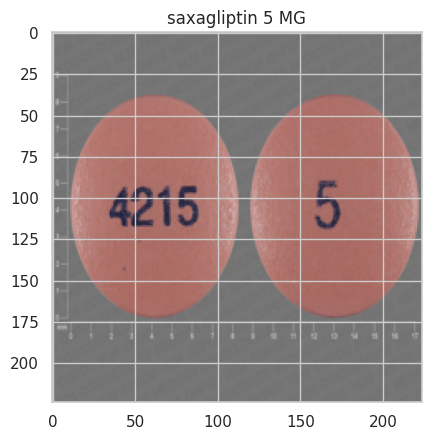

In [ ]:
#See the image with class label
plt.imshow(images[29])
plt.title(class_names[29])

Text(0.5, 1.0, 'Ramipril 5 MG')

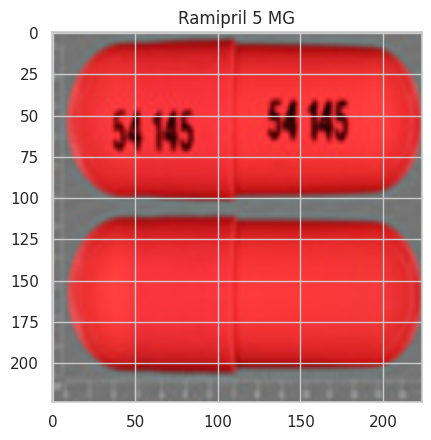

In [ ]:
#See the image with class label
plt.imshow(images[79])
plt.title(class_names[79])

Text(0.5, 1.0, 'Atomoxetine 25 MG')

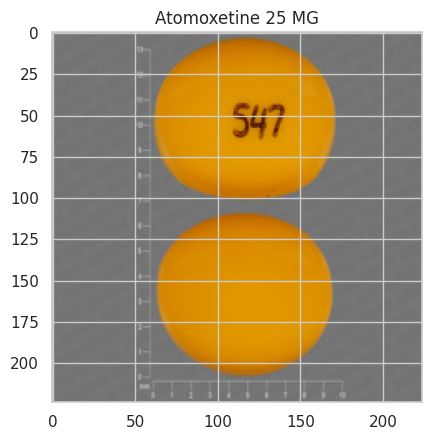

In [ ]:
#See the image with class label
plt.imshow(images[5])
plt.title(class_names[515])

In [ ]:
# Convert the images into array
images =  np.array(images)

In [ ]:
# Shape of the images
images.shape

(994, 224, 224, 3)

In [ ]:

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(df['Class_label'])

In [ ]:
y[:10]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
y.shape

(994, 20)

In [ ]:
enc.classes_

array(['Amoxicillin 500 MG', 'Atomoxetine 25 MG', 'Calcitriol 0.00025 MG',
       'Oseltamivir 45 MG', 'Ramipril 5 MG', 'apixaban 2.5 MG',
       'aprepitant 80 MG', 'benzonatate 100 MG', 'carvedilol 3.125 MG',
       'celecoxib 200 MG', 'duloxetine 30 MG', 'eltrombopag 25 MG',
       'montelukast 10 MG', 'mycophenolate mofetil 250 MG',
       'pantoprazole 40 MG', 'pitavastatin 1 MG', 'prasugrel 10 MG',
       'saxagliptin 5 MG', 'sitagliptin 50 MG', 'tadalafil 5 MG'],
      dtype='<U28')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3,stratify = y,random_state=50)

In [ ]:
X_train.shape

(695, 224, 224, 3)

In [ ]:
X_test.shape

(299, 224, 224, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the CNN model
model_cnn = Sequential()

# First Convolutional Block
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Second Convolutional Block
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Third Convolutional Block
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))

# Flatten and Dense Layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))  # High dropout for generalization
model_cnn.add(Dense(20, activation='softmax'))  # Adjust the output layer for 20 classes

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model_cnn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Train the model
# Assuming X_train, y_train, X_test, y_test are prepared and compatible with the model
batch_size = 100
epochs = 20
history = model_cnn.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        epochs=epochs,
                        validation_data=(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 148s 20s/step - accuracy: 0.1503 - loss: 5.0568 - val_accuracy: 0.0468 - val_loss: 10.8864
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 20s/step - accuracy: 0.3615 - loss: 2.3995 - val_accuracy: 0.1472 - val_loss: 5.5835
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 136s 19s/step - accuracy: 0.4441 - loss: 1.7112 - val_accuracy: 0.1304 - val_loss: 5.6742
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 136s 19s/step - accuracy: 0.5828 - loss: 1.3184 - val_accuracy: 0.1873 - val_loss: 6.4140
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 134s 19s/step - accuracy: 0.5901 - loss: 1.2326 - val_accuracy: 0.1371 - val_loss: 6.3005
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 146s 21s/step - accuracy: 0.6620 - loss: 1.0166 - val_accuracy: 0.1371 - val_loss: 5.3685
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 193s 19s/step - accuracy: 0.7074 - loss: 0.9472 - val_accuracy: 0.2040 - val_loss: 4.8215
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 142s 21s/step - accuracy: 0.7539 - loss: 0.7531 - val_accuracy: 0.1538 - val_loss

In [ ]:
#print the test accuracy
score = model_cnn.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

NameError: name 'model_cnn' is not defined

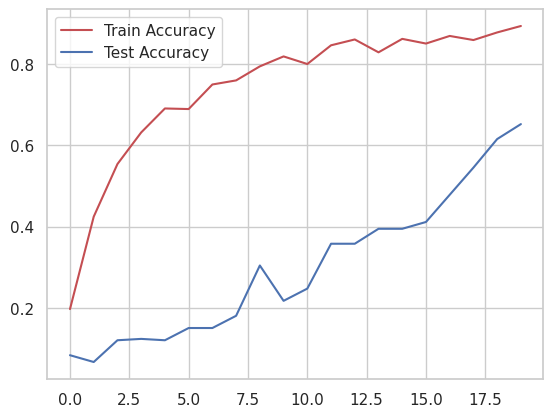

In [ ]:
# plot the accuracy plot
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

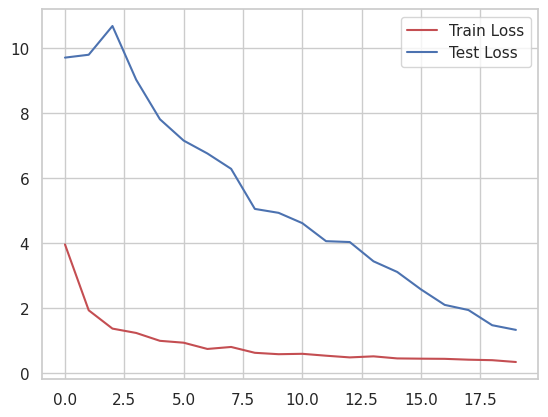

In [ ]:
# plot the accuracy plot
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


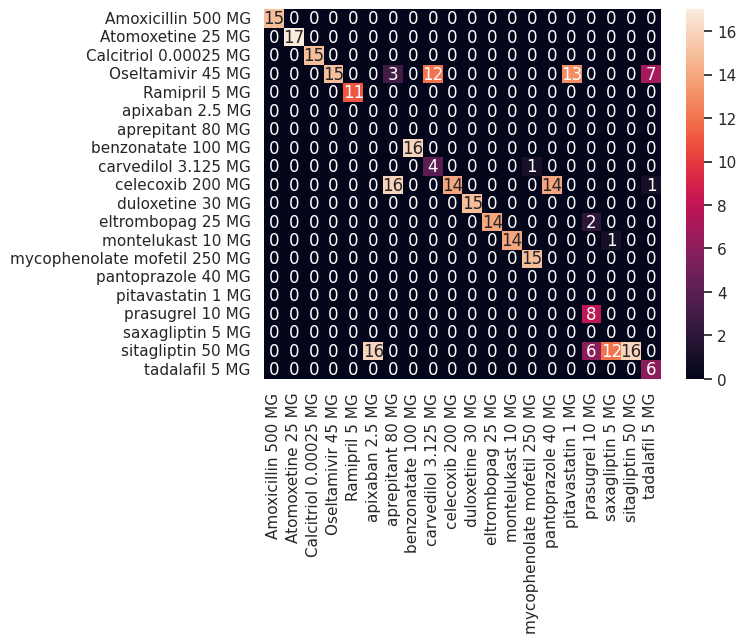

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_cnn.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Model Definition
model_mob = Sequential()
mob = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
model_mob.add(mob)  # Assuming 'mob' is a pre-trained model or feature extractor
model_mob.add(Flatten())
model_mob.add(Dense(128, activation='relu'))
model_mob.add(BatchNormalization())
model_mob.add(Dropout(0.5))  # Increased dropout rate for better generalization
model_mob.add(Dense(64, activation='relu'))  # Reduced model complexity
model_mob.add(Dropout(0.5))
model_mob.add(Dense(20, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model_mob.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Training with data augmentation if possible
# Assuming X_train, y_train are your training data
# Use an image data generator to apply real-time data augmentation during training
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Fit the model using the data generator
model_mob.fit(datagen.flow(X_train, y_train, batch_size=100), epochs=10, validation_data=(X_test, y_test))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 276s 30s/step - accuracy: 0.1109 - loss: 3.8937 - val_accuracy: 0.1505 - val_loss: 3.6791
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 198s 28s/step - accuracy: 0.3446 - loss: 2.2384 - val_accuracy: 0.1171 - val_loss: 3.6763
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 189s 27s/step - accuracy: 0.5256 - loss: 1.5282 - val_accuracy: 0.1137 - val_loss: 3.7299
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 181s 26s/step - accuracy: 0.5963 - loss: 1.2678 - val_accuracy: 0.1371 - val_loss: 3.6286
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 214s 28s/step - accuracy: 0.6592 - loss: 1.0914 - val_accuracy: 0.1572 - val_loss: 3.4315
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 185s 27s/step - accuracy: 0.7533 - loss: 0.8779 - val_accuracy: 0.1773 - val_loss: 3.2442
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 211s 28s/step - accuracy: 0.7369 - loss: 0.8338 - val_accuracy: 0.1706 - val_loss: 3.1137
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 192s 27s/step - accuracy: 0.8167 - loss: 0.6724 - val_accuracy: 0.2007 - val_loss:

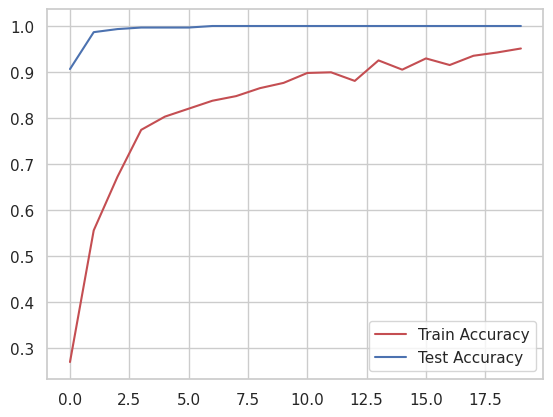

In [ ]:
# plot the accuracy plot
plt.plot(History_mob.history['accuracy'], 'r')
plt.plot(History_mob.history['val_accuracy'], 'b')
plt.legend({'Train Accuracy': 'r', 'Test Accuracy':'b'})
plt.show()

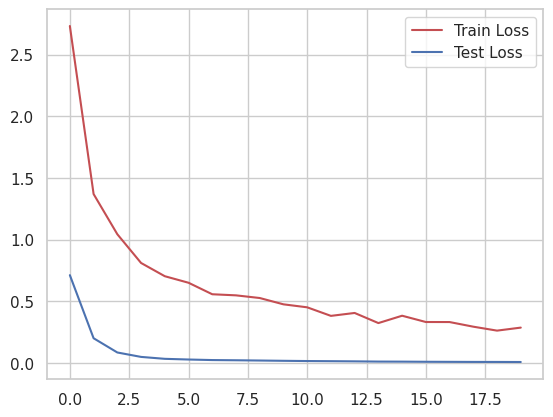

In [ ]:
# plot the accuracy plot
plt.plot(History_mob.history['loss'], 'r')
plt.plot(History_mob.history['val_loss'], 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [ ]:
#print the test accuracy
score = model_mob.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 1.0


10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step


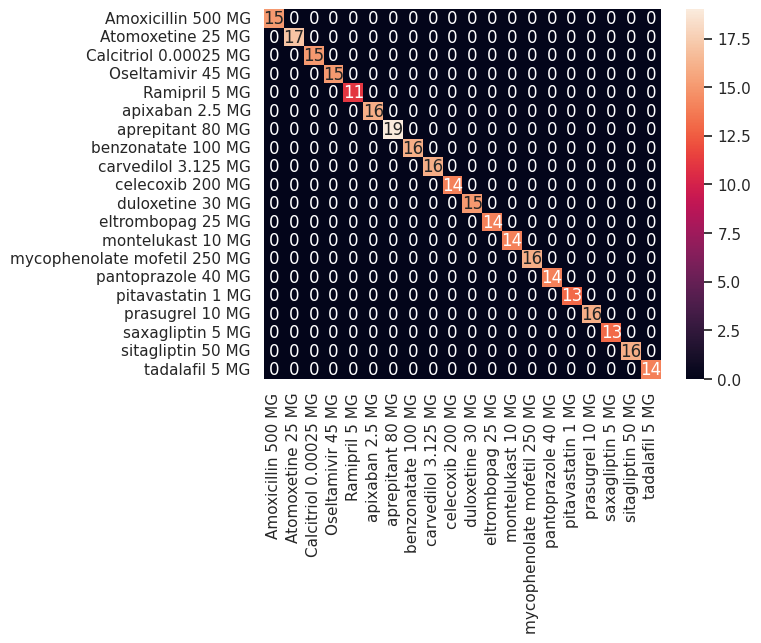

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
class_names = enc.classes_
df_heatmap = pd.DataFrame(confusion_matrix(np.argmax((model_mob.predict(X_test)),axis = 1),np.argmax(y_test,axis=1)),columns = class_names, index = class_names)
heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

In [ ]:
i = 44
pred = np.argmax(model_mob.predict(np.array([X_test[i]]))[0])
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))
plt.imshow(X_test[i])